In [46]:
#Importing All the Libraries And Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [113]:
train = pd.read_csv('loan_prediction.csv')

In [114]:
train


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [47]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,145.824104,342.00000,0.842199
std,6109.041673,2926.248369,84.092905,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


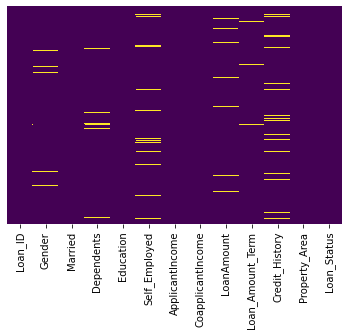

In [7]:
#showing the null values as we can see credit_history and Self_employed column has the most number of Null Values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# preprocessing Dataset 

In [49]:
# find the null values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
# fill the missing values for numerical terms - mean
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mean())

In [52]:
# fill the missing values for categorical terms - mode
train['Gender'] = train["Gender"].fillna(train['Gender'].mode()[0])
train['Married'] = train["Married"].fillna(train['Married'].mode()[0])
train['Dependents'] = train["Dependents"].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train["Self_Employed"].fillna(train['Self_Employed'].mode()[0])

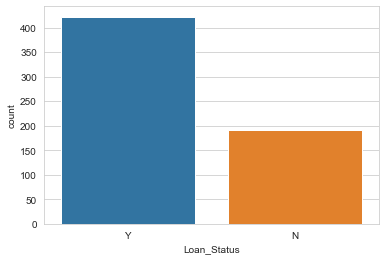

In [9]:
#showing the countplot  to how many person are eligible for LoAN STATUS
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',data=train)

In [54]:
#checking Again for the Null value
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

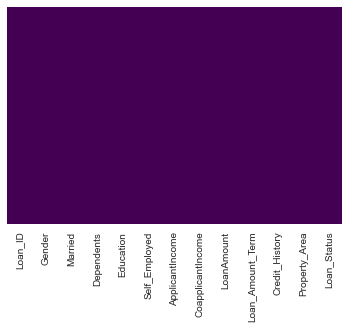

In [56]:
#No Null values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Exploratory Data Analysis

In [116]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


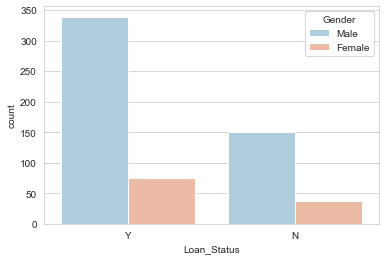

In [115]:
#Maximum person for eligible for Loan status are from Male Gender
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Gender',data=train,palette='RdBu_r')

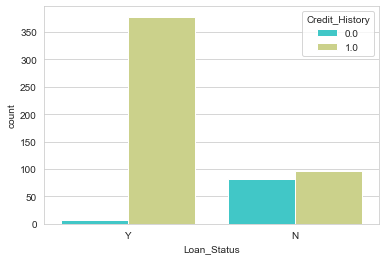

In [117]:
#showing The connection Between Loan Status and Credit History
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Credit_History',data=train,palette='rainbow')

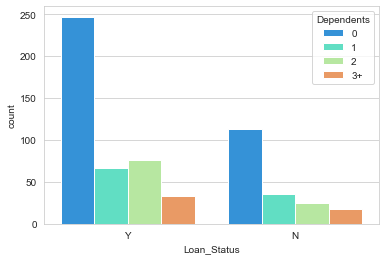

In [61]:
#showing The connection Between Loan Status and Dependents
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Dependents',data=train,palette='rainbow')

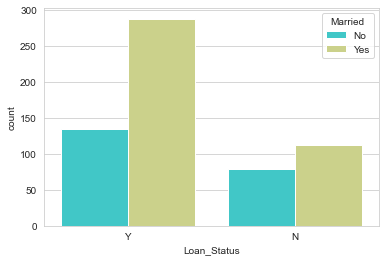

In [62]:
#showing The connection Between Loan Status and Maritual Status
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Married',data=train,palette='rainbow')

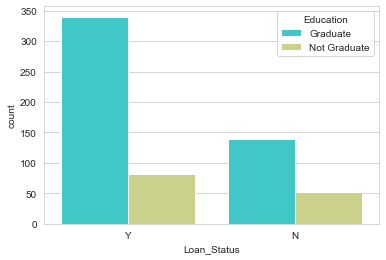

In [63]:
#showing The connection Between Loan Status and Education Status
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Education',data=train,palette='rainbow')

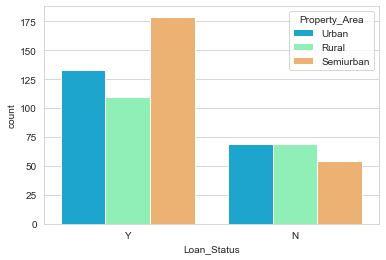

In [64]:
#showing The connection Between Loan Status and Property_Area
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Property_Area',data=train,palette='rainbow')

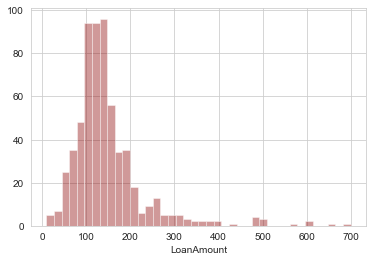

In [65]:
#showing In a displot(histogram) about the range of Loan Amount taking and Normal Distribution
sns.distplot(train['LoanAmount'].dropna(),kde=False,color='darkred',bins=40)

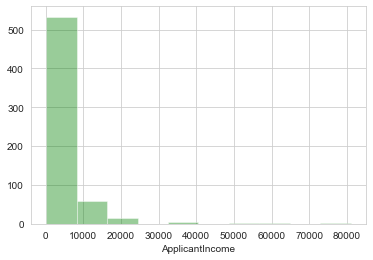

In [66]:
#showing In a displot(histogram) about the range of Applicant Income and Normal Distribution
sns.distplot(train['ApplicantIncome'].dropna(),kde=False,color='Green',bins=10)

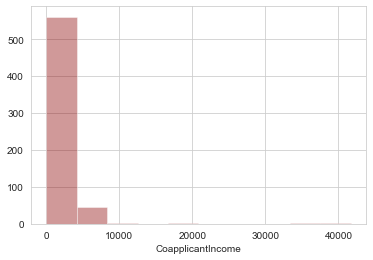

In [67]:
#showing In a displot(histogram) about the range of Co applicant Income and Normal Distribution
sns.distplot(train['CoapplicantIncome'].dropna(),kde=False,color='darkred',bins=10)

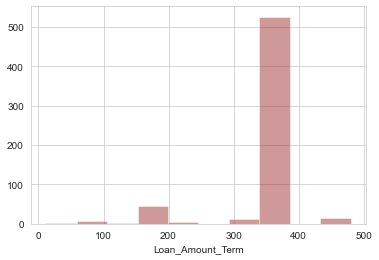

In [68]:
#showing In a displot(histogram) about the range of Loan_Amount_Term and Normal Distribution
sns.distplot(train['Loan_Amount_Term'].dropna(),kde=False,color='darkred',bins=10)

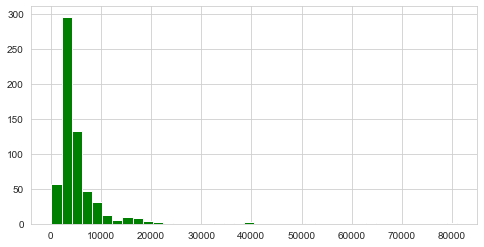

In [69]:
train['ApplicantIncome'].hist(color='green',bins=40,figsize=(8,4))

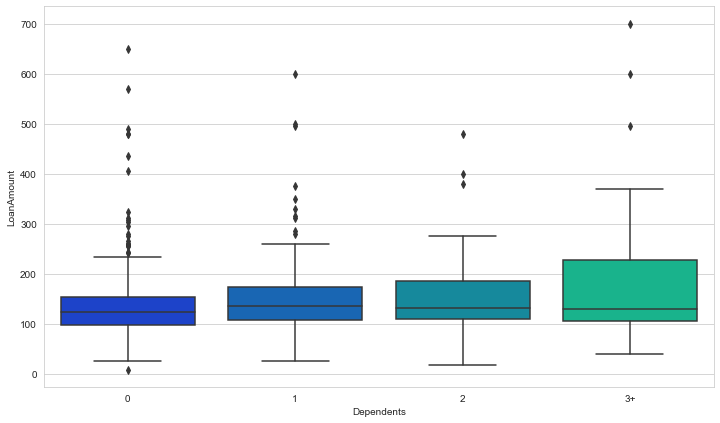

In [70]:

plt.figure(figsize=(12, 7))
sns.boxplot(x='Dependents',y='LoanAmount',data=train,palette='winter')

In [43]:
train['LoanAmount'] = train[['LoanAmount','Dependents']].apply(impute_LoanAmount,axis=1)

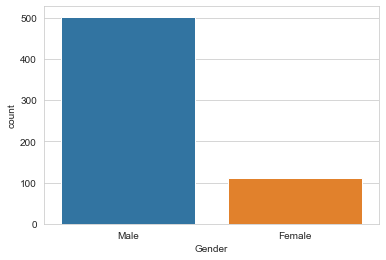

In [73]:

# categorical attributes visualization
sns.countplot(train['Gender'])


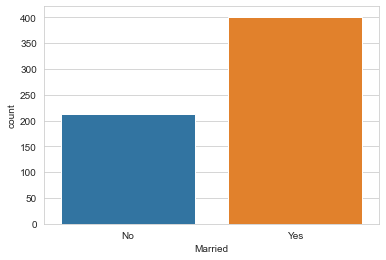

In [74]:
sns.countplot(train['Married'])

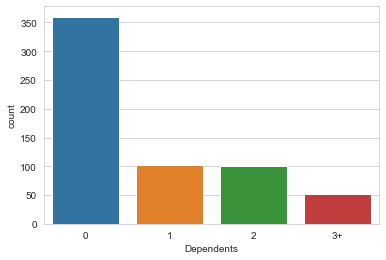

In [75]:
sns.countplot(train['Dependents'])

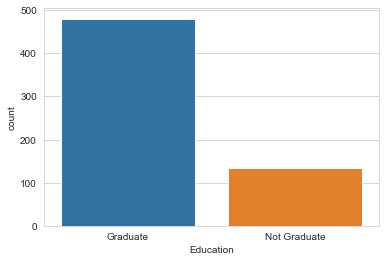

In [76]:
sns.countplot(train['Education'])

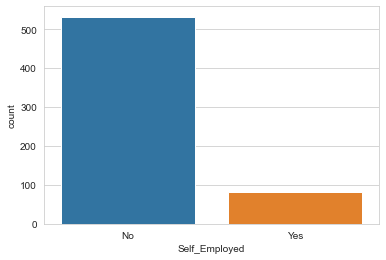

In [77]:
sns.countplot(train['Self_Employed'])

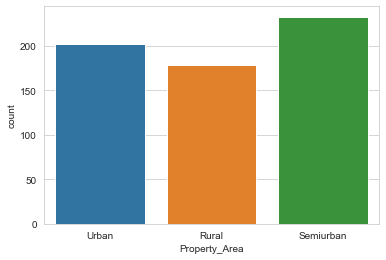

In [78]:
sns.countplot(train['Property_Area'])

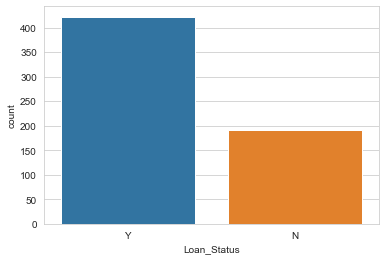

In [79]:
sns.countplot(train['Loan_Status'])

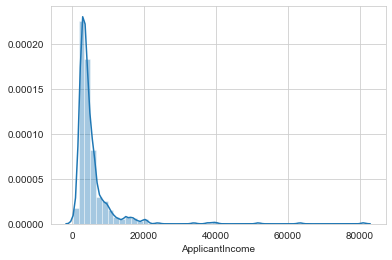

In [80]:
# numerical attributes visualization
sns.distplot(train["ApplicantIncome"])

# Creating New Attributes Total Income 

In [81]:
# total income
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


# Log Transformation

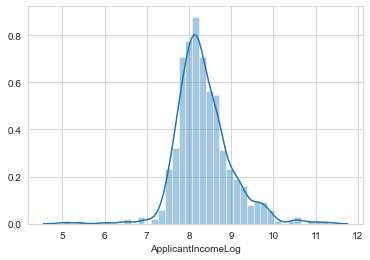

In [121]:
# apply log transformation to the attribute
train['ApplicantIncomeLog'] = np.log(train['ApplicantIncome'])
sns.distplot(train["ApplicantIncomeLog"])

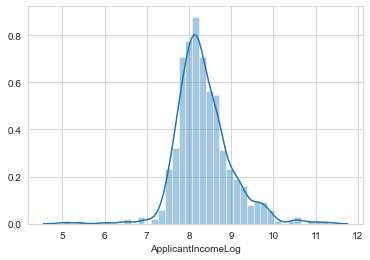

In [123]:
train['CoapplicantIncomeLog'] = np.log(train['CoapplicantIncome'])
sns.distplot(train["ApplicantIncomeLog"])

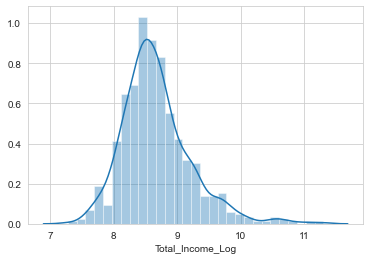

In [84]:
train['Total_Income_Log'] = np.log(train['Total_Income'])
sns.distplot(train["Total_Income_Log"])

# Coorealation MAtrix

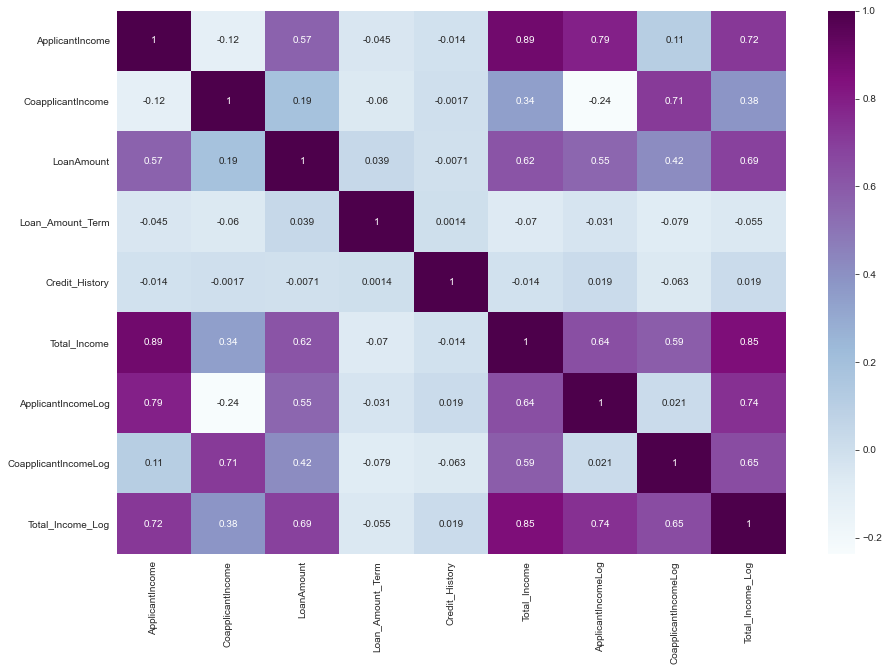

In [85]:
corr = train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [87]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
train = train.drop(columns=cols, axis=1)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,8.699515


In [89]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    train[col] = le.fit_transform(train[col])
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,8.699515


# Model Building And Machine Learning Approaches


Train_test Split

In [90]:
# specify input and output attributes
X = train.drop(columns=['Loan_Status'], axis=1)
y = train['Loan_Status']

In [92]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Model Training

In [94]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [96]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


In [97]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 74.02597402597402
Cross validation is 71.82860189257629


In [103]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 77.92207792207793
Cross validation is 77.6969212315074


In [104]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 69.48051948051948
Cross validation is 75.0859656137545


Hyperparameter tuning

In [105]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.78368652538984


Confusion Matrix

In [106]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [107]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[20, 23],
       [ 5, 75]], dtype=int64)

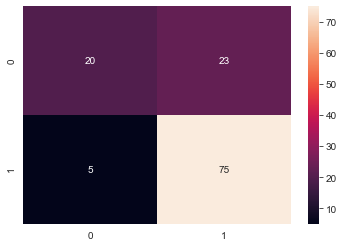

In [108]:
sns.heatmap(cm, annot=True)

# Thank You 